In [25]:
from tqdm import tqdm
from matplotlib import pyplot as plt
import random

In [26]:
def calculate_E(R_1, R_2):
    return 1.0/(1.0+10.0**((R_2 - R_1) / 400.0))

def update_R(R, S, E):
    return R + 32.0*(S - E)

def play_match(R_A, R_B, epsilon):
    E_A = calculate_E(R_A, R_B)
    E_B = 1.0 - E_A
    result_A = int(random.random() < epsilon)
    result_B = 1.0 - result_A
    R_A = update_R(R_A, result_A, E_A)
    R_B = update_R(R_B, result_B, E_B)
    return R_A, R_B

In [56]:
R_A = 2000
R_B = 2000
epsilon = 0.7
E_A = 1.0/(1.0+10.0**((R_B - R_A) / 400.0))

Es = []
Es.append(E_A)
rs = [R_A]

K = 32.0
C = 400.0

for i in tqdm(range(10**3)):
    # Calculate expected score for A
    E_A = 1.0 / (1.0 + 10.0**((R_B - R_A) / C))
    result_A = int(random.random() < epsilon)
    r_star = K * (result_A - E_A)
    R_A = R_A + r_star
    R_B = R_B - r_star  # Elo is zero-sum for two players

    Es.append(E_A)
    rs.append(R_A)

# print(Es)
# print(E1s)


100%|██████████| 1000/1000 [00:00<?, ?it/s]


0.6865078227089215
2071.643937932284
0.03284139844400504


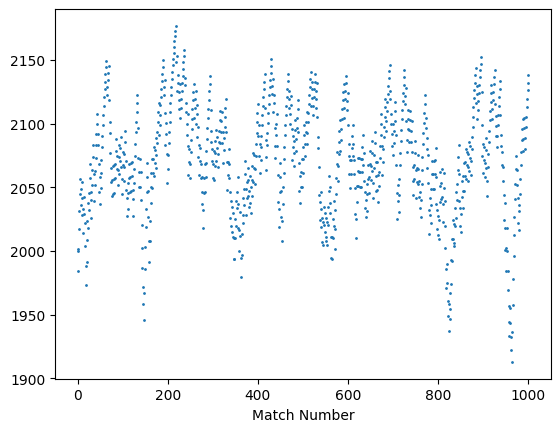

In [57]:
E_diffs = [abs(Es[i] - Es[i-1]) for i in range(1, len(Es))]


# print mean of Es
print(sum(Es) / len(Es))
print(sum(rs) / len(rs))
print(sum(E_diffs) / len(E_diffs))
# plot Es
points = 10000
plt.plot(list(range(len(rs))), rs, 'o', markersize=1)
plt.xlabel('Match Number')
plt.show()  


In [29]:
64*epsilon*(1-epsilon)

15.36

In [30]:
X = 10**((64/400) * (1-epsilon)) - 1
Y = 10**(-(64/400) * epsilon) - 1
X_dash = (X)/(1 + epsilon * X)
Y_dash = (Y)/(1 + epsilon * Y)

epsilon * (1-epsilon) * (epsilon * abs(X_dash) + (1-epsilon) * abs(Y_dash))

0.04248562607025587

In [31]:
def next_E(E, S):
    r_star = K * (S - E)
    return E * (10**(2*r_star/C)) / (1 + E * (10**(2*r_star/C) - 1))

expected_E_diff = epsilon * abs(next_E(epsilon, 1) - epsilon) + (1-epsilon) * abs(next_E(epsilon, 0) - epsilon)
expected_E_diff

0.042485626070255876

In [32]:
first_bracket = (10**((64/400)*(1-epsilon)))/(1 + epsilon * (10**((64/400)*(1-epsilon)) - 1)) - 1
second_bracket = (10**((64/400)*(-epsilon)))/(1 + epsilon * (10**((64/400)*(-epsilon)) - 1)) - 1
epsilon * (epsilon * abs(first_bracket) + (1-epsilon) * abs(second_bracket))

0.042485626070255834

In [33]:
X = 10**((64/400) * (1-epsilon)) - 1
Y = 10**(-(64/400) * epsilon) - 1
first_bracket = (X + 1)/(1 + epsilon * X) - 1
second_bracket = (Y + 1)/(1 + epsilon * Y) - 1
epsilon * (epsilon * abs(first_bracket) + (1-epsilon) * abs(second_bracket))

0.042485626070255834

In [34]:
X = 10**((64/400) * (1-epsilon)) - 1
Y = 10**(-(64/400) * epsilon) - 1
first_bracket = (X - epsilon * X)/(1 + epsilon * X)
second_bracket = (Y - epsilon * Y)/(1 + epsilon * Y)
epsilon * (epsilon * abs(first_bracket) + (1-epsilon) * abs(second_bracket))

0.04248562607025587

In [35]:
X = 10**((64/400) * (1-epsilon)) - 1
Y = 10**(-(64/400) * epsilon) - 1
first_bracket = (X)/(1 + epsilon * X)
second_bracket = (Y)/(1 + epsilon * Y)
epsilon * (1-epsilon) * (epsilon * abs(first_bracket) + (1-epsilon) * abs(second_bracket))

0.04248562607025587